# This script is for analyzing and plotting 180 peel test

## How do I grab the PSD data?
If you are grabbing data during testing, you can skip step 1

Step 1 is to open the Instron Bluehill program, and click *Test* and then *Continue Test* and open your data
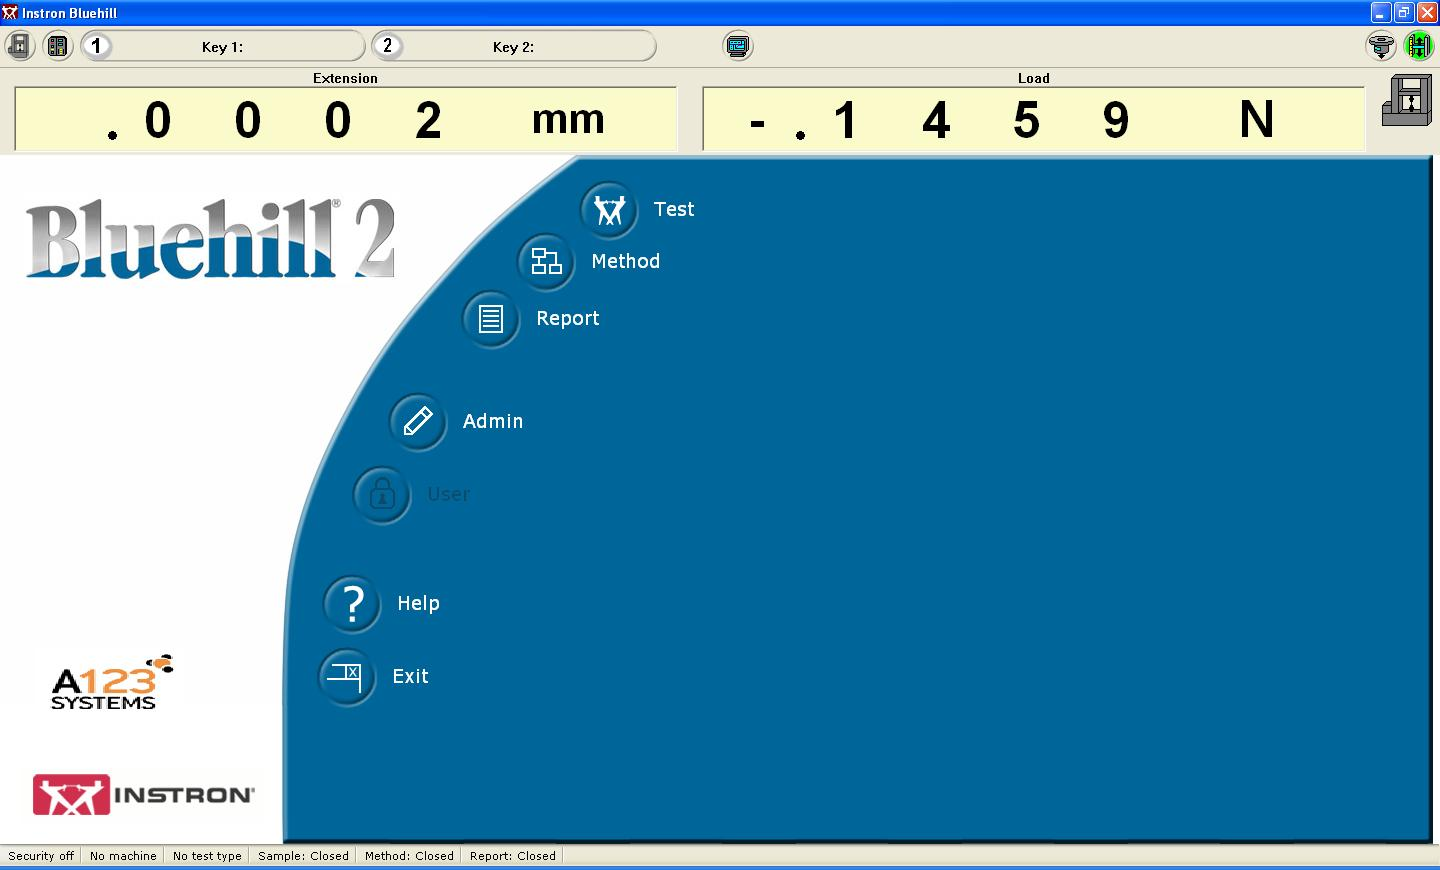

Step 2 is once you have the data open, you will probably end up on the window below, just click back and you will move to the last data results of the test
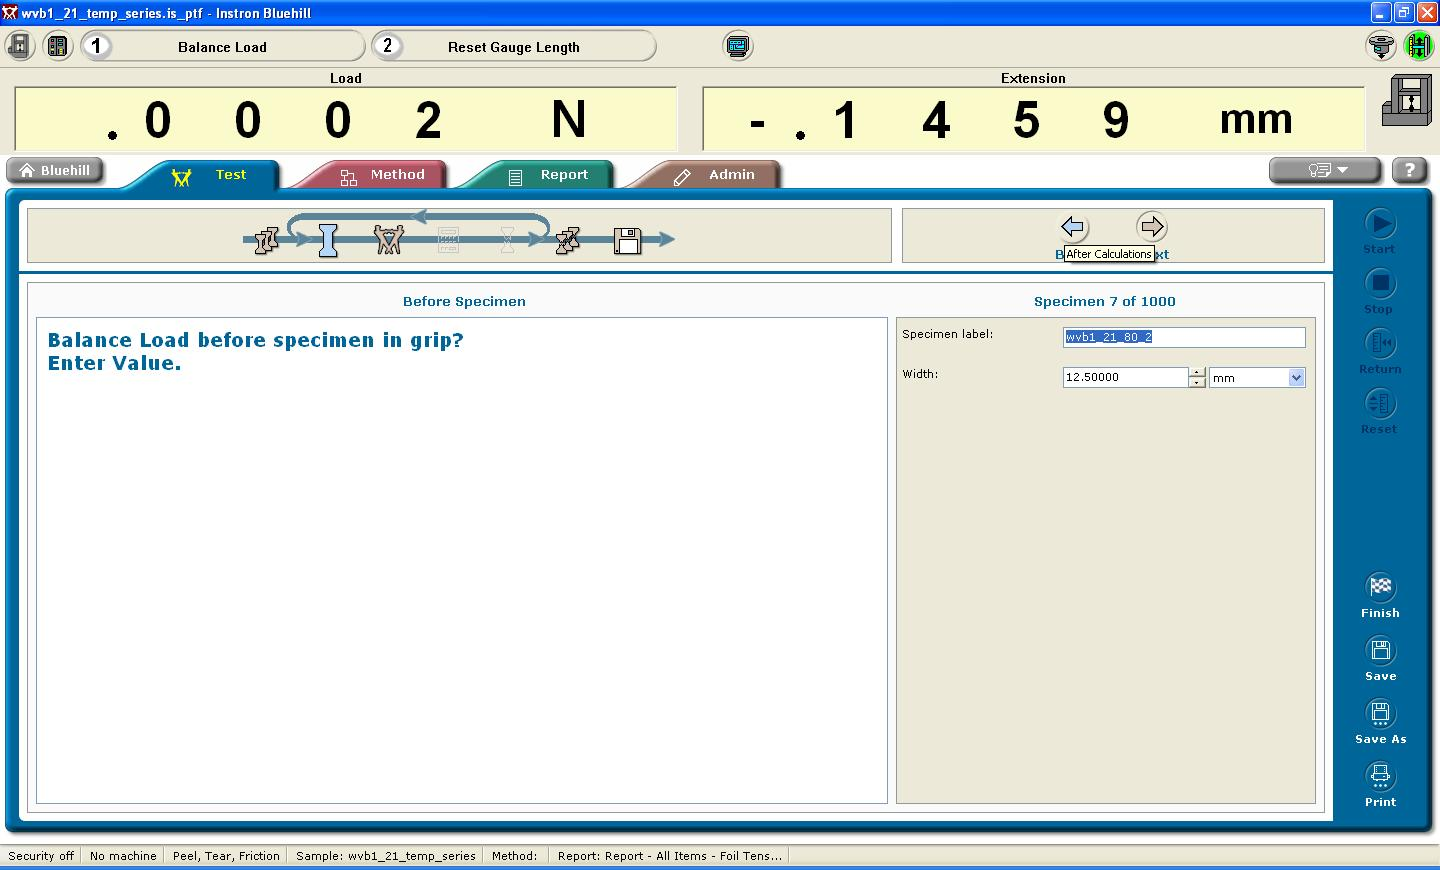

Step 3 is to right-click the cell on the top left under *Raw Data Viewer* and click *copy table* --  open a *notepad* (.txt) file and paste (Ctrl+V) the data into the .txt file and save the data
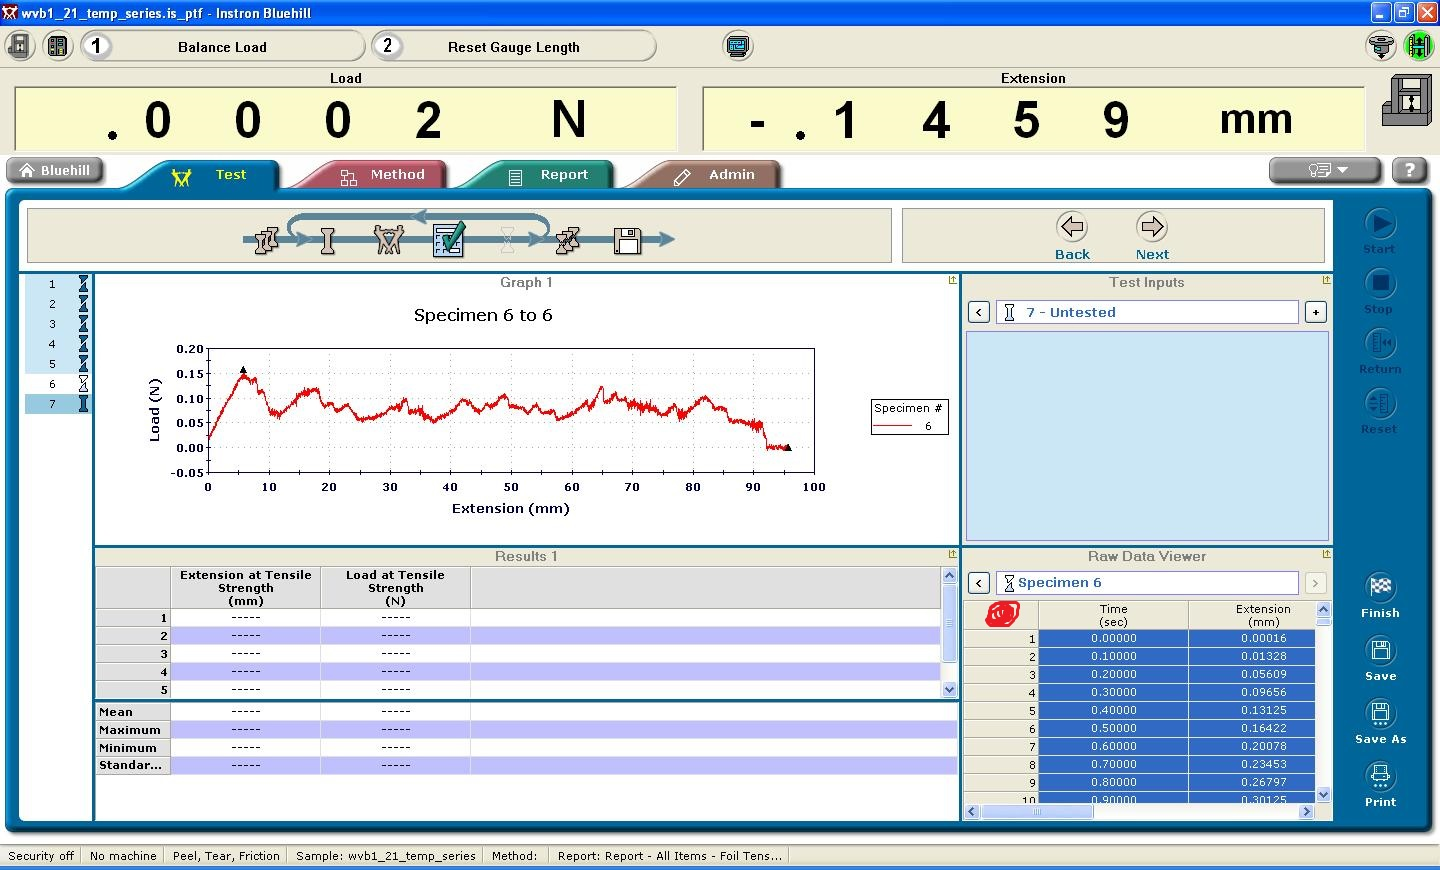

If you need to get multiple samples from a single data file, just click the arrows next to specimen (above the table) and repeat the process of Step 3

## How should the format be for the files?
Below is an example of how it will look at the end:
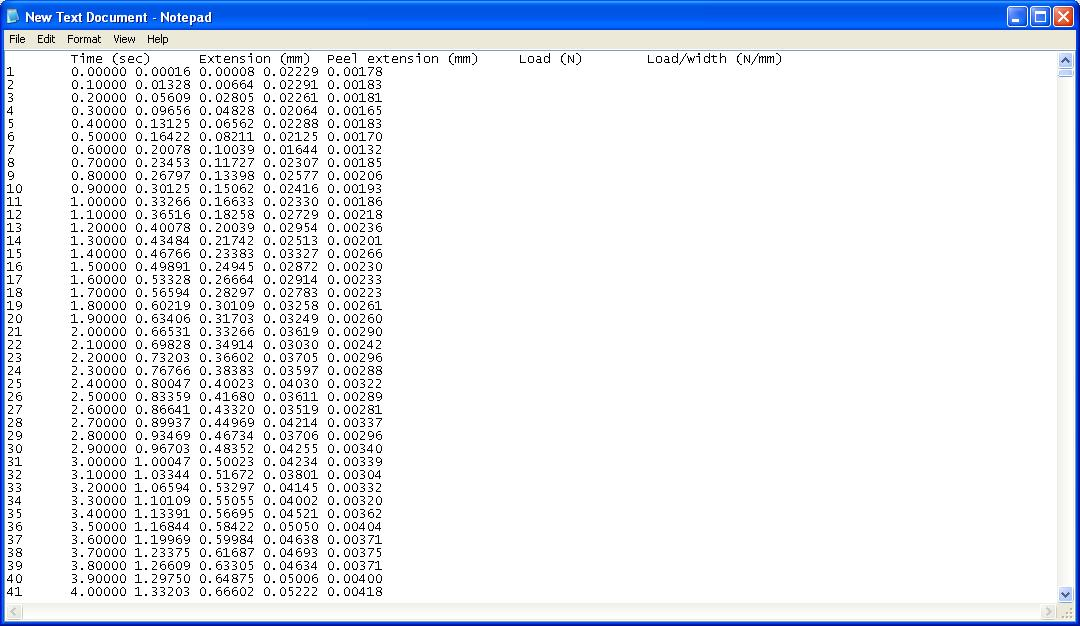

## How do I use this script? I don't know any coding...
No problem, if you can hit Shift+Enter and type into prompts then you are fine.

### Step 1
You should see a blue bar to the left of this text, this refers to which part of the code the system will read next. To have the system read the code, just hit Shift+Enter and it will go to the next "Cell"

### Step 2
Each cell will have a Blurb at the top with a # before it, this is meant to tell you what the cell is doing. There are some cells that you don't need to worry about changing and others that only need very minor input.

Read the blurb and follow the instructions

You can tell if the cell is done running by either an output such as a number or plot OR it will read "DONE"


In [ ]:
#Don't worry about it, just hit Shift+Enter

#Author: Wess van den Bergh
#Date Modified: Nov 1, 2024
#Environment: v3_CombatCocktail
#Verified By: 

#Notes, known errors, desired features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tkinter import *
import cmcrameri as cmc
import textwrap

def import_teamed_data():
    """ grabs data from folders with GUI and then has user provide a custom name for plotting """
    # Create Tk root
    root = Tk()
    # Hide the main window
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    
    from tkinter import filedialog
    infiles = filedialog.askopenfilename(multiple=True)
    
    %gui tk

    #preallocating the dataframe
    custom_labels = pd.DataFrame(columns = ['filepath', 'label'])
    custom_labels = pd.concat([custom_labels, pd.DataFrame([{} for _ in range(len(infiles))])], ignore_index=True)
    
    for i,path in enumerate(infiles): 
        custom_labels.loc[i, 'filepath'] = path
        filename = os.path.basename(path)
        custom_labels.loc[i, 'label'] = str(input("Enter a label for {}: ".format(filename)))
        if len(infiles) > 1:
            custom_labels.loc[i, 'team'] = (input("GROUP/CONDITION name for {} -- ENSURE THE NAMES MATCH: ".format(custom_labels.iloc[i]['label'])))
        elif len(infiles) == 1:
            custom_labels.loc[i, 'team'] = custom_labels.loc[i, 'label']
        
    return custom_labels


def adhesion_plot_check(temp_data, label):
    """
    Plots the data for cutoffs to be applied by the user
    """
    FONTSIZE = 14
    LEGEND_FONTSIZE = 10
    LEGEND_POS = "upper left"
    
    fig, ax = plt.subplots()
    
    plt.plot(temp_data.loc[:, "Extension (mm)"], temp_data.loc[:, "Load/width (N/mm)"])
    plt.minorticks_on()
    plt.tick_params(axis='x', which='major', direction='in', length=25, width=1, colors='k', grid_color='k', grid_alpha=0.5)
    plt.tick_params(axis='x', which='minor', direction='in', length=15, width=1, colors='k', grid_color='k', grid_alpha=0.5)
    plt.ylabel("Load/width (N/mm)", fontsize = FONTSIZE, fontweight = 'bold')
    plt.xlabel("Extension (mm)", fontsize = FONTSIZE, fontweight = 'bold')
    plt.xticks(fontsize=FONTSIZE, fontweight='bold')
    plt.yticks(fontsize=FONTSIZE, fontweight='bold')
    plt.gca().spines['top'].set_linewidth(4)    # Set top spine thickness
    plt.gca().spines['bottom'].set_linewidth(4) # Set bottom spine thickness
    plt.gca().spines['left'].set_linewidth(4)   # Set left spine thickness
    plt.gca().spines['right'].set_linewidth(4)  # Set right spine thickness
    
    
    legend = plt.legend(label, framealpha=1, frameon=True, fontsize=LEGEND_FONTSIZE, loc=LEGEND_POS)
    frame = legend.get_frame()
    frame.set_edgecolor('black')  # Set legend box color
    frame.set_linewidth(2)        # Set legend box thickness
    for text in legend.get_texts():
        text.set_fontweight('bold')
    
    plt.show()


def wrap_labels(ax, width = 10, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

def process_adhesion_data(adhesion_data, 
                          csv_of_stats_label = ""):
    """
    Processes the data with user inputted cutoff values and plots the data
    """ 
    CAPSIZE = 5
    FONTSIZE = 14
    LINEWIDTH = 4
    AX_FONT_SIZE = 14
    LEGEND_FONT_SIZE = 10
    LEGEND_POS = "upper right"
    
    adhesion_data_sorted = adhesion_data.sort_values(by = 'team')
    unique_teams = adhesion_data_sorted['team'].unique()
    
    processed_adhesion_data = pd.DataFrame(columns = ['team', 'average load (N/mm)', 'stddev load (N/mm)', 'count'])
    processed_adhesion_data['team'] = unique_teams
    
    for team in unique_teams:
        forloop_of_team = adhesion_data_sorted[adhesion_data_sorted['team'] == team]
        
        try:
            del temp_team_data
        except UnboundLocalError:
            pass
    
        for j in range(len(forloop_of_team)):
            if '.csv' in forloop_of_team.iloc[j]['filepath']:
                temp_data = pd.read_csv(forloop_of_team.iloc[j]['filepath'], skiprows = 7, header = 0)
                temp_data = temp_data.rename(columns = {"(sec)": "Time (sec)", "(mm)": "Extension (mm)", "(mm).1": "Peel extension (mm)", "(N)": "Load (N)", "(N/mm)": "Load/width (N/mm)"})
            else:
                temp_data = pd.read_csv(forloop_of_team.iloc[j]['filepath'], sep = '\t', skiprows = 0, header = 0)
            
            adhesion_plot_check(temp_data, label = forloop_of_team.iloc[j]['label'])
            
            test_lower_limit = float(input("What is the lower limit Extension (mm)?:  "))
            test_upper_limit = float(input("What is the upper limit Extension (mm)?:  "))
            temp_data_filtered = temp_data[(temp_data["Extension (mm)"] > test_lower_limit) & 
                                          (temp_data["Extension (mm)"] > test_upper_limit)]
            plt.clf()
            
            try: 
                temp_team_data = np.concatenate((temp_team_data, np.array(temp_data_filtered["Load/width (N/mm)"])), axis = 0)
            except UnboundLocalError:
                temp_team_data = np.array(temp_data_filtered["Load/width (N/mm)"])
                print(type(temp_team_data))
            
        #get average and standard deviation of data
            
        processed_adhesion_data.loc[processed_adhesion_data['team'] == team, 'average load (N/mm)'] = temp_team_data.mean()        
        processed_adhesion_data.loc[processed_adhesion_data['team'] == team, 'stddev load (N/mm)'] = temp_team_data.std() 
        processed_adhesion_data.loc[processed_adhesion_data['team'] == team, 'count'] = len(temp_team_data)
    
    fig, ax = plt.subplots()

    ax.bar(processed_adhesion_data['team'],
           processed_adhesion_data['average load (N/mm)'], 
           yerr = processed_adhesion_data['stddev load (N/mm)'], 
           capsize = CAPSIZE)

    plt.xticks(fontsize=FONTSIZE, fontweight='bold')
    plt.yticks(fontsize=FONTSIZE, fontweight='bold')
    ax.set_ylabel("Avg. Load (± std dev) (N/mm)", fontsize = FONTSIZE, fontweight = 'bold')
    plt.box(True)
    plt.gca().spines['top'].set_linewidth(4)    # Set top spine thickness
    plt.gca().spines['bottom'].set_linewidth(4) # Set bottom spine thickness
    plt.gca().spines['left'].set_linewidth(4)   # Set left spine thickness
    plt.gca().spines['right'].set_linewidth(4)  # Set right spine thickness
    
    wrap_labels(ax, width = 10, break_long_words = True) #makes it so that the long labels wrap as nicely as possible
    
    plt.show()

    fig = plt.figure(figsize=(8, 6))
    
    for i in range(len(adhesion_data_sorted)):
        if '.csv' in adhesion_data_sorted.iloc[i]['filepath']:
            temp_data = pd.read_csv(adhesion_data_sorted.iloc[i]['filepath'], skiprows = 7, header = 0)
            temp_data = temp_data.rename(columns = {"(sec)": "Time (sec)", "(mm)": "Extension (mm)", "(mm).1": "Peel extension (mm)", "(N)": "Load (N)", "(N/mm)": "Load/width (N/mm)"})
        else:
            temp_data = pd.read_csv(adhesion_data_sorted.iloc[i]['filepath'], sep = '\t', skiprows = 0, header = 0)

        plt.plot(temp_data.loc[:, "Extension (mm)"], temp_data.loc[:, "Load/width (N/mm)"], linewidth = LINEWIDTH, c = cmc.cm.batlow((i/len(adhesion_data_sorted)*0.8)))
        del temp_data

            # Add labels and title
    plt.xlabel('Extension (mm)',  fontsize = AX_FONT_SIZE, fontweight = 'bold')
    plt.ylabel('Load/width (N/mm)',  fontsize = AX_FONT_SIZE, fontweight = 'bold')
    plt.xticks(fontsize=AX_FONT_SIZE, fontweight='bold')
    plt.yticks(fontsize=AX_FONT_SIZE, fontweight='bold')
    
    plt.tick_params(axis='both', direction='in', length=10)  # Set the length of tick marks

    plt.box(True)
    plt.gca().spines['top'].set_linewidth(4)    # Set top spine thickness
    plt.gca().spines['bottom'].set_linewidth(4) # Set bottom spine thickness
    plt.gca().spines['left'].set_linewidth(4)   # Set left spine thickness
    plt.gca().spines['right'].set_linewidth(4)  # Set right spine thickness

    legend = plt.legend(adhesion_data_sorted['label'], framealpha=1, frameon=True, fontsize=LEGEND_FONT_SIZE, loc=LEGEND_POS)
    frame = legend.get_frame()
    frame.set_edgecolor('black')  # Set legend box color
    frame.set_linewidth(2)        # Set legend box thickness
    for text in legend.get_texts():
        text.set_fontweight('bold')
    plt.show()

    if len(csv_of_stats_label) > 0:
        processed_adhesion_data.to_csv('{csvlabel}.csv'.format(csvlabel = csv_of_stats_label))
    
    return processed_adhesion_data

print("DONE")

In [ ]:
#Don't worry about it, just hit Shift+Enter

adhesion_data = import_teamed_data()
summarized_data = process_adhesion_data(adhesion_data)

print(summarized_data)